# CMSC 197: MACHINE LEARNING
## Implementing Linear Regression with Gradient Descent as Optimization Function

Name: Karielle Faith Cirunay

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Loading data and dropping unnecessary columns

In [77]:
data = pd.read_csv("data/Advertising.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [78]:
dataX = data.drop(['Sales'], axis=1)  
dataY = data.Sales.values

## DATA STANDARDIZATION

In [79]:
# Standardize using sklearn's scale function
X = pd.DataFrame(scale(dataX), columns=dataX.columns)

#Add Bias column, new column which contains 1 for each data point
X.insert(0, 'Bias', [1]*len(X))
X

,Bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217
196,1,-0.617035,-1.240003,-1.033598
197,1,0.349810,-0.942899,-1.111852
198,1,1.594565,1.265121,1.640850


## Splitting the Dataset

In [80]:
# Split data into training (85%) and testing (15%) sets
X_train, X_test, y_train, y_test = train_test_split(X, dataY, test_size=0.15, random_state=42)

print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)
print("Training Target:", y_train.shape)
print("Testing Target:", y_test.shape)

Training Features: (170, 4)
Testing Features: (30, 4)
Training Target: (170,)
Testing Target: (30,)


# LINEAR REGRESSION using gradient descent

### Initialize weights

In [81]:
def initialize_weights(n_features, seed=None, use_random=True):
# def initialize_weights(n_features):
    if seed is not None:
        np.random.seed(seed)  
    
    if use_random:
        # Initialize weights 
        init_w = np.random.uniform(0, 1, n_features)
    else:
        # Initialize weights to zeros
        init_w = np.array([0.0, 0.0, 0.0, 0.0])
    
    return init_w
    
n_features = X.shape[1]  
weights = initialize_weights(n_features, seed=42, use_random=True)
weights

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

### Predict

In [82]:
def predict(X, weights):
    predictions = np.dot(X, weights)
    return predictions

### compute cost

In [83]:
def compute_cost(dataY,predictions):
    m = len(dataY)    
    cost = (1 / (2 * m)) * np.sum((predictions - dataY) ** 2)
    
    return cost

### compute gradient

In [84]:
def compute_gradient(X, dataY, weights):
    m = len(dataY) 
    
    predictions = predict (X, weights)  
    errors = predictions - dataY  
    
    # Compute gradient for each weight
    gradients = (1 / m) * np.dot(X.T, errors)
    
    return gradients

### Update weights

In [85]:
def update_weights(weights, gradients, learning_rate):
    updated_weights = weights - learning_rate * gradients
    return updated_weights

### Gradient descent

In [86]:
def grad_descent(X, dataY, learning_rate, iterations):
    costs = []
    weights = initialize_weights (X.shape[1])

    
    for i in range(iterations):
        predictions = predict (X, weights)
        # Compute the cost function
        cost = compute_cost(dataY,predictions)
        costs.append(cost)
        
        # update the weights
        gradients = compute_gradient(X, dataY, weights)
        weights = update_weights(weights, gradients, learning_rate)
    
    return weights, costs

### obtaining the optimal weights

In [87]:
# Define learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Run the gradient descent algorithm to get final weights and cost values
final_weights, cost_values = grad_descent(X, dataY, learning_rate, iterations)

print("Final Weights:\n", final_weights)


Final Weights:
 [14.02190137  3.91906831  2.7892951  -0.01972041]


### Plot cost

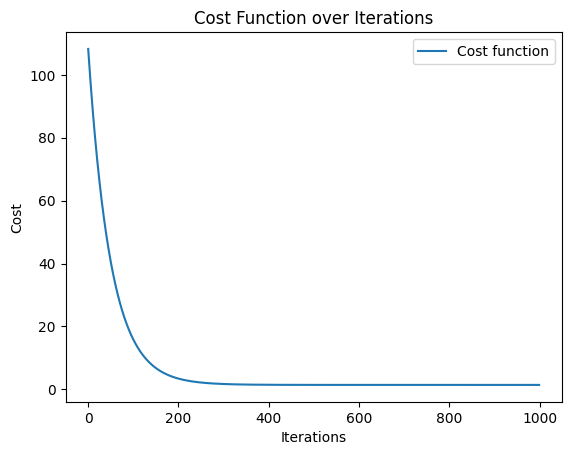

In [89]:
# Plot the cost values
def plot_costs(costs):
    plt.plot(range(iterations), costs, label='Cost function')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.legend()
    plt.show()

plot_costs(cost_values)

### Predict train cost

In [90]:
# Predict y for train set and calculate the cost
train_predictions = predict(X_train, final_weights)
train_cost = compute_cost(y_train, train_predictions)
print("Training Cost:", train_cost)

compare = pd.DataFrame({'Actual':y_train,'Predicted':train_predictions})
compare

Training Cost: 1.3943073241577681


,Actual,Predicted
0,10.6,12.552784
1,11.3,9.950179
2,23.7,21.290835
3,8.7,11.861820
4,16.1,18.368904
...,...,...
165,7.2,6.127869
166,19.0,18.433847
167,19.4,19.157422
168,12.6,12.384714


### Predict test cost

In [91]:
# Predict y for test set and calculate the cost
test_predictions = predict(X_test, final_weights)
test_cost = compute_cost(y_test, test_predictions)
print("Test Cost:", test_cost)

compare = pd.DataFrame({'Actual':y_test,'Predicted':test_predictions})
compare

Test Cost: 1.3793811048191527


,Actual,Predicted
0,16.9,16.315628
1,22.4,20.816928
2,21.4,21.633719
3,7.3,10.383245
4,24.7,22.246376
5,12.6,12.919926
6,22.3,21.103871
7,8.4,7.395194
8,11.5,13.745044
9,14.9,15.161129


### R2 (train and test set)

In [92]:
# Calculate and print R² score for Train and Test sets
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f'R2 Score for Training Set: {r2_train}')
print(f'R2 Score for Testing Set: {r2_test}')

R2 Score for Training Set: 0.8933867187946081
R2 Score for Testing Set: 0.9139993824617716


## Computing MSE

In [93]:
def compute_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# Predicting the training set
y_train_pred = predict(X_train, final_weights)  
# Predict the output on the test set 
y_test_pred = predict(X_test, final_weights)

# Compute MSE on the training and test set
mse_train = compute_mse(y_train, y_train_pred)
mse_test = compute_mse(y_test, y_test_pred)

print("Mean Squared Error on the Training Set:", mse_train)
print("Mean Squared Error on the Test Set:", mse_test)

Mean Squared Error on the Training Set: 2.7886146483155363
Mean Squared Error on the Test Set: 2.7587622096383053


### Reverting a standardize data

In [136]:
# Calculate mean and std for the original data
means = dataX.mean()
stds = dataX.std()

# Function to revert standardization
def revert_standardization(X_scaled, means, stds):
    return (X_scaled * stds.values + means.values).round(1)

# Revert the train and test sets
X_train_original = revert_standardization(X_train.drop('Bias', axis=1), means, stds)
X_test_original = revert_standardization(X_test.drop('Bias', axis=1), means, stds)

print("Reverted Training Set:")
print (X_train_original)

print("\nReverted Testing Set:")
print (X_test_original)

Reverted Training Set:
        TV  Radio  Newspaper
9    199.9    2.5       21.2
18    69.0   20.5       18.3
55   199.0   49.5       60.1
75    16.6   43.8       89.5
150  281.0   13.9       37.0
..     ...    ...        ...
106   24.7   11.0       29.7
14   204.2   32.9       46.0
92   217.9   33.5       59.1
179  165.6   10.0       17.6
102  280.5   10.1       21.4

[170 rows x 3 columns]

Reverted Testing Set:
        TV  Radio  Newspaper
95   163.3   31.6       53.0
15   195.5   47.8       53.0
30   293.3   28.3       43.2
158   11.4   36.9       45.2
128  220.5   49.1        3.1
115   74.9   35.0       52.8
69   217.0   44.0       27.2
170   49.8   11.6       18.4
174  222.6    3.4       13.1
45   175.2   22.5       31.5
66    31.2   24.6        2.1
182   56.0    5.7       29.7
165  234.7    3.4       84.9
78     5.0   29.9        9.3
186  139.5    2.0       26.6
177  170.3    7.8       35.2
56     6.9   28.1       41.4
152  197.7   23.3       14.2
82    75.1   20.3       32.5
68

# SCATTERPLOT for train and test set and providing R2

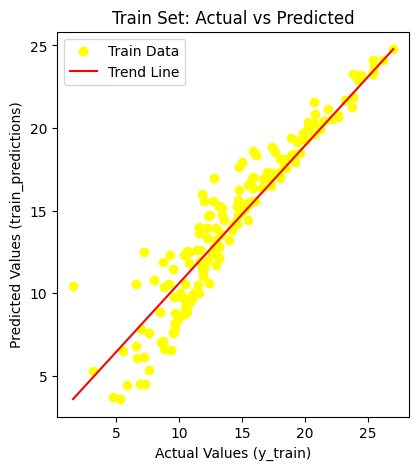

In [95]:
# Scatter plot for Train set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='yellow', label='Train Data')
plt.plot([min(y_train), max(y_train)], [min(train_predictions), max(train_predictions)], color='red', label='Trend Line')
plt.title('Train Set: Actual vs Predicted')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (train_predictions)')
plt.legend()

plt.show()

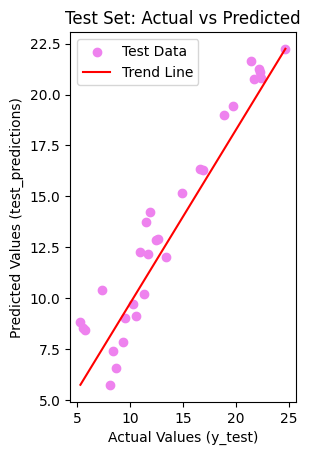

In [96]:
# Scatter plot for Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='violet', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(test_predictions), max(test_predictions)], color='red', label='Trend Line')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (test_predictions)')
plt.legend()

plt.show()

# Observing R2 and MSE as iterations increased to 50000

In [97]:
learning_rate = 0.01
iterations = 50000  

# Call the existing gradient descent function
final_weights, cost_values = grad_descent(X_train, y_train, learning_rate, iterations)

# Calculate R² and MSE for train and test sets using the final weights
train_predictions = predict(X_train, final_weights)
test_predictions = predict(X_test, final_weights)

# Calculate MSE for training and testing sets
mse_train = compute_cost(y_train, train_predictions)
mse_test = compute_cost(y_test, test_predictions)

# Calculate R² scores for training and testing sets
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

# Print the results
print("Final Weights:\n", final_weights)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print(f'R² Score for Training Set: {r2_train}')
print(f'R² Score for Testing Set: {r2_test}')

Final Weights:
 [14.02477267  3.83763432  2.79115525  0.01635503]
Training MSE: 1.3904801309297574
Testing MSE: 1.4270465959010532
R² Score for Training Set: 0.8936793584593188
R² Score for Testing Set: 0.9110275702091717


Plotting the result data

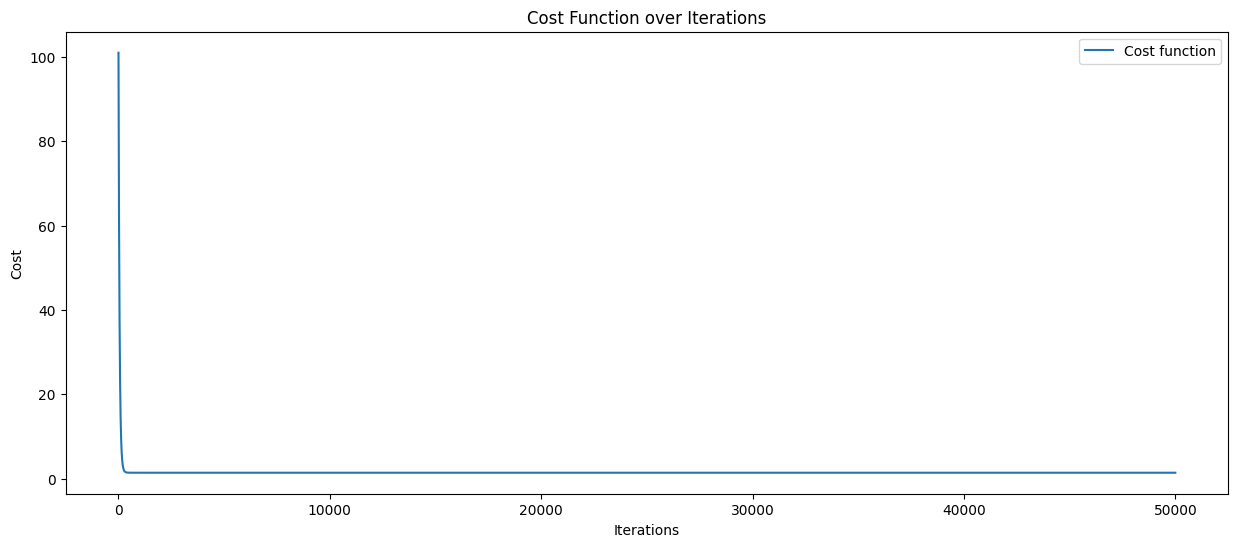

In [105]:
# Plot the cost values
def plot_costs(costs):
    plt.figure(figsize=(15, 6))
    plt.plot(range(iterations), costs, label='Cost function')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.legend()
    plt.show()

plot_costs(cost_values)

# Determine the optimal number of iterations and check the effect on cost and error as learning rate changes. VISUALIZE the cost function.

Determine the optimal iteration

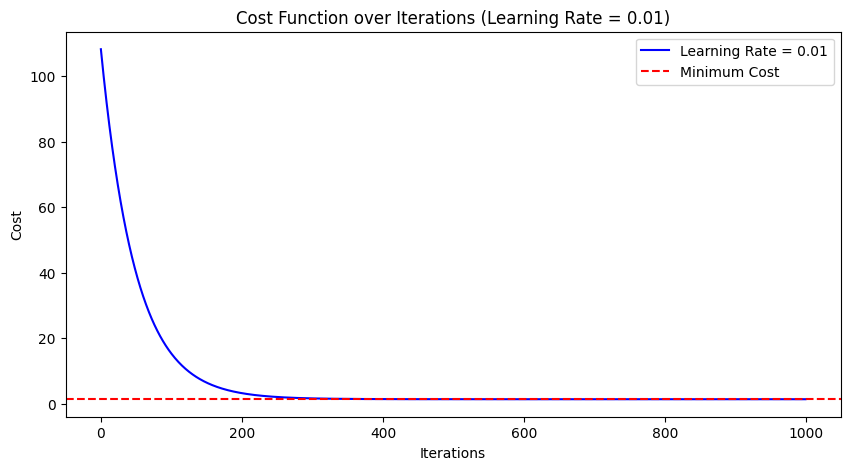

In [68]:
# Determine optimal number of iterations
max_iterations = 1000
learning_rate = 0.01  
_, costs_for_optimal_lr = grad_descent(X_train, y_train, learning_rate, max_iterations)

# Plot the cost function to find the optimal number of iterations
plt.figure(figsize=(10, 5))
plt.plot(range(max_iterations), costs_for_optimal_lr, label='Learning Rate = 0.01', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations (Learning Rate = 0.01)')
plt.axhline(y=min(costs_for_optimal_lr), color='r', linestyle='--', label='Minimum Cost')
plt.legend()
plt.show()


# Check the effect on the cost and error as learning rate chanages.

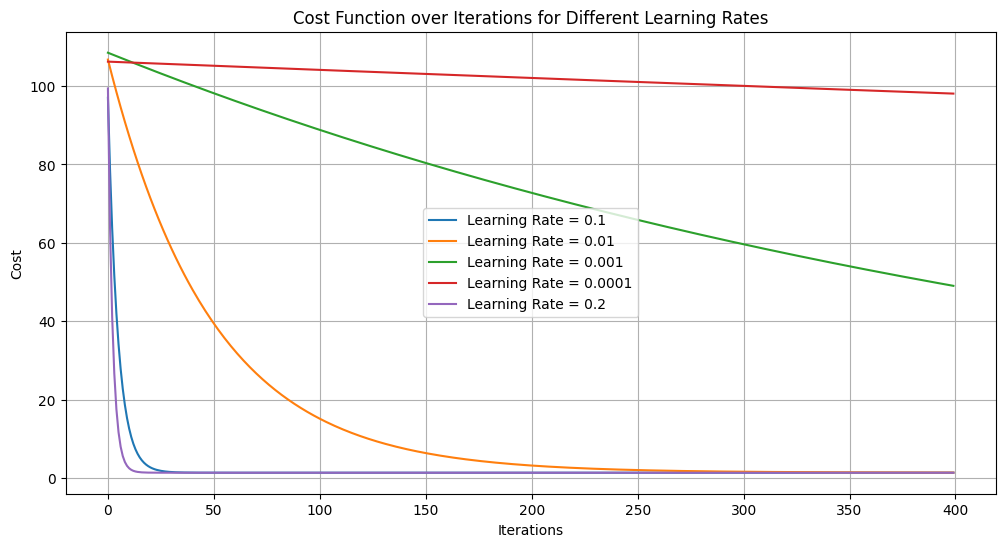

In [74]:
# Define different learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
optimal_iterations = 400  
costs_per_lr = {}

# Calculate costs for each learning rate
for lr in learning_rates:
    _, costs = grad_descent(X_train, y_train, lr, optimal_iterations)
    costs_per_lr[lr] = costs

# Plot the cost function for each learning rate
plt.figure(figsize=(12, 6))
for lr, costs in costs_per_lr.items():
    plt.plot(range(optimal_iterations), costs, label=f'Learning Rate = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

# Comparing results with Ordinary Least Squares Function

In [104]:
# Fit a Linear Regression model using Ordinary Least Squares
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Get the coefficients (weights) from the OLS model
ols_weights = ols_model.coef_
ols_intercept = ols_model.intercept_
print("OLS Weights:", ols_weights)
print("OLS Intercept:", ols_intercept)

# Make predictions using the OLS model
train_predictions_ols = ols_model.predict(X_train)
test_predictions_ols = ols_model.predict(X_test)

# Calculate MSE for training and testing sets using OLS predictions
mse_train_ols = compute_mse(y_train, train_predictions_ols)
mse_test_ols = compute_mse(y_test, test_predictions_ols)

# Calculate R² scores for OLS predictions
r2_train_ols = r2_score(y_train, train_predictions_ols)
r2_test_ols = r2_score(y_test, test_predictions_ols)

# Print the OLS results
print("OLS Mean Squared Error on the Training Set:", mse_train_ols)
print("OLS Mean Squared Error on the Test Set:", mse_test_ols)
print(f'OLS R² Score for Training Set: {r2_train_ols}')
print(f'OLS R² Score for Testing Set: {r2_test_ols}')

# Compare OLS results with Gradient Descent results
print("\n--- Comparison of Gradient Descent and OLS Results ---")
print(f"Gradient Descent MSE (Testing): {mse_test}")
print(f"OLS MSE (Testing): {mse_test_ols}")

print(f"\nGradient Descent MSE (Training): {mse_train}")
print(f"OLS MSE (Training): {mse_train_ols}")

print(f"\nGradient Descent R² Score (Training): {r2_train}")
print(f"OLS R² Score (Training): {r2_train_ols}")

print(f"\nGradient Descent R² Score (Testing): {r2_test}")
print(f"OLS R² Score (Testing): {r2_test_ols}")


OLS Weights: [0.         3.83763432 2.79115525 0.01635503]
OLS Intercept: 14.02477266922176
OLS Mean Squared Error on the Training Set: 2.780960261859515
OLS Mean Squared Error on the Test Set: 2.8540931918021184
OLS R² Score for Training Set: 0.8936793584593188
OLS R² Score for Testing Set: 0.9110275702091714

--- Comparison of Gradient Descent and OLS Results ---
Gradient Descent MSE (Testing): 1.4270465959010532
OLS MSE (Testing): 2.8540931918021184

Gradient Descent MSE (Training): 1.3904801309297574
OLS MSE (Training): 2.780960261859515

Gradient Descent R² Score (Training): 0.8936793584593188
OLS R² Score (Training): 0.8936793584593188

Gradient Descent R² Score (Testing): 0.9110275702091717
OLS R² Score (Testing): 0.9110275702091714
